In [1]:
from functions import extract_image_from_RAS_file_cupd, extract_image_from_RAS_file_cupd_all
import matplotlib.pyplot as plt
import torch
import numpy as np

/home/luser/anaconda3/envs/stelar/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
datapath = './dataset/lai_ras/'

In [3]:
image_length = 10980

image_width = 10980

select_image = 0

#for i in range(1):
#k=i+1
#year = 20
#month=1

In [4]:
import glob
filepaths = glob.glob('./dataset/lai_ras/*.RAS')

filepaths.sort()
filepaths = filepaths[:2]
#print("filepaths", filepaths)

datapath_filename = filepaths[0]
filename = '32UQV_2001.RAS'
#print("datapath_filename", datapath_filename)

In [ ]:
'''for datapath_filename in filepaths:
    print("datapath_filename", datapath_filename)
    test = extract_all_LAI_from_RAS_file(datapath_filename, image_length, image_width)
    print(test.shape)'''

In [ ]:
# to get one selected image
'''filename = '32UQV_2005.RAS'
image_length = 10980
image_width = 10980
select_image = 2
img, img_array = extract_image_from_RAS_file_cupd(datapath, filename, image_length, image_width, select_image)'''

In [49]:
# to get all images in a given file
filename = '32UQV_2003.RAS'
image_length = 10980
image_width = 10980
img, img_array = extract_image_from_RAS_file_cupd_all(datapath, filename, image_length, image_width)

img_array = np.array(img_array)

a.shape (843922800,)
cluster_len 7
select_image 0
(a[select_image*(image_length*image_width):(select_image+1)*(image_length*image_width)]).shape (120560400,)
image.shape here (10980, 10980, 3)
select_image 1
(a[select_image*(image_length*image_width):(select_image+1)*(image_length*image_width)]).shape (120560400,)
image.shape here (10980, 10980, 3)
select_image 2
(a[select_image*(image_length*image_width):(select_image+1)*(image_length*image_width)]).shape (120560400,)
image.shape here (10980, 10980, 3)
select_image 3
(a[select_image*(image_length*image_width):(select_image+1)*(image_length*image_width)]).shape (120560400,)
image.shape here (10980, 10980, 3)
select_image 4
(a[select_image*(image_length*image_width):(select_image+1)*(image_length*image_width)]).shape (120560400,)
image.shape here (10980, 10980, 3)
select_image 5
(a[select_image*(image_length*image_width):(select_image+1)*(image_length*image_width)]).shape (120560400,)
image.shape here (10980, 10980, 3)
select_image 6
(a

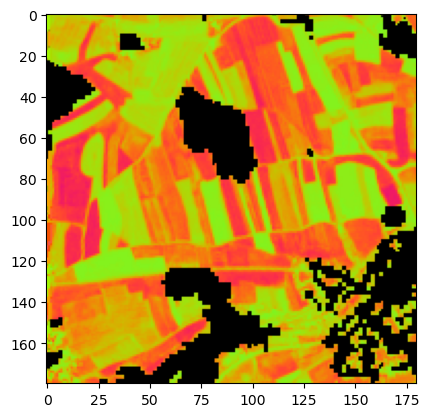

In [25]:
plt.imshow(img_array[3][:180,:180,:])

In [50]:
#ch 0 max = 255
#ch 1 max = 243
#ch 2 max = 140

# Run the below separately and not inside any loops

chnl_0_range = 4
chnl_1_range = 4
chnl_2_range = 4

ch_0_max = 255
ch_1_max = 243
ch_2_max = 140

ch0_dist = np.linspace(0, ch_0_max, chnl_0_range).astype(int)
ch1_dist = np.linspace(0, ch_1_max, chnl_1_range).astype(int)
ch2_dist = np.linspace(0, ch_2_max, chnl_2_range).astype(int)


In [55]:
i_th_day = 0
for i_th_day in range(len(img_array)):

    for i in range(len(ch0_dist)):
        img_array[i_th_day][:,:,0][abs(img_array[i_th_day][:,:,0] - ch0_dist[i]) <= ch0_dist[1]/2] = ch0_dist[i]

    for i in range(len(ch1_dist)):
        img_array[i_th_day][:,:,1][abs(img_array[i_th_day][:,:,1] - ch1_dist[i]) <= ch1_dist[1]/2] = ch1_dist[i]

    for i in range(len(ch2_dist)):
        img_array[i_th_day][:,:,2][abs(img_array[i_th_day][:,:,2] - ch2_dist[i]) <= ch2_dist[1]/2] = ch2_dist[i]


    P1 = float(271)
    P2 = float(293)
    a=img_array[i_th_day][:,:,0]
    b=img_array[i_th_day][:,:,1]
    c=img_array[i_th_day][:,:,2]

    test_ch = (a*P1 + b)*P2 + c

    test_ch_unqs = np.unique(test_ch)
    print("test_ch_unqs.shape", test_ch_unqs.shape)

    for i in range(len(test_ch_unqs)):
        test_ch[test_ch == test_ch_unqs[i]] = i
    test_ch = test_ch.astype(int)
    print("test_ch.shape", test_ch.shape)
    print("test_ch.max()", test_ch.max())
    print("test_ch.min()", test_ch.min())    
    print()
    print("day ", i_th_day, " done")

test_ch_unqs.shape (10,)
test_ch.shape (10980, 10980)
test_ch.max() 9
test_ch.min() 0

day  0  done
test_ch_unqs.shape (10,)
test_ch.shape (10980, 10980)
test_ch.max() 9
test_ch.min() 0

day  1  done
test_ch_unqs.shape (10,)
test_ch.shape (10980, 10980)
test_ch.max() 9
test_ch.min() 0

day  2  done
test_ch_unqs.shape (10,)
test_ch.shape (10980, 10980)
test_ch.max() 9
test_ch.min() 0

day  3  done
test_ch_unqs.shape (10,)
test_ch.shape (10980, 10980)
test_ch.max() 9
test_ch.min() 0

day  4  done
test_ch_unqs.shape (10,)
test_ch.shape (10980, 10980)
test_ch.max() 9
test_ch.min() 0

day  5  done
test_ch_unqs.shape (10,)
test_ch.shape (10980, 10980)
test_ch.max() 9
test_ch.min() 0

day  6  done


In [52]:




for i in range(len(ch0_dist)):
    img_array[i_th_day][:,:,0][abs(img_array[i_th_day][:,:,0] - ch0_dist[i]) <= ch0_dist[1]/2] = ch0_dist[i]

for i in range(len(ch1_dist)):
    img_array[i_th_day][:,:,1][abs(img_array[i_th_day][:,:,1] - ch1_dist[i]) <= ch1_dist[1]/2] = ch1_dist[i]

for i in range(len(ch2_dist)):
    img_array[i_th_day][:,:,2][abs(img_array[i_th_day][:,:,2] - ch2_dist[i]) <= ch2_dist[1]/2] = ch2_dist[i]


P1 = float(271)
P2 = float(293)
a=img_array[i_th_day][:,:,0]
b=img_array[i_th_day][:,:,1]
c=img_array[i_th_day][:,:,2]

test_ch = (a*P1 + b)*P2 + c

test_ch_unqs = np.unique(test_ch)
print("test_ch_unqs.shape", test_ch_unqs.shape)

for i in range(len(test_ch_unqs)):
    test_ch[test_ch == test_ch_unqs[i]] = i
test_ch = test_ch.astype(int)
print("test_ch.shape", test_ch.shape)
print("test_ch.max()", test_ch.max())
print("test_ch.min()", test_ch.min())

test_ch_unqs.shape (10,)
test_ch.shape (10980, 10980)
test_ch.max() 9
test_ch.min() 0


In [56]:
test_ch.shape

(10980, 10980)

In [63]:
loaded_test.shape

(10980, 10980)

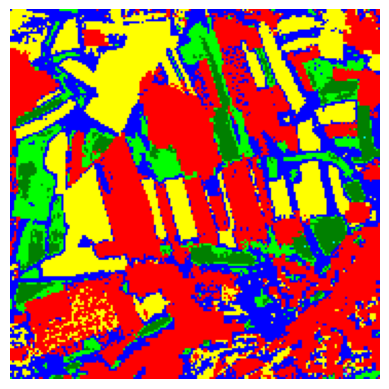

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Example segmented image (assuming it's already available)

loaded_test = np.load('./dataset/arbitrary_masks/32UQV_2001_mask_mesr_0.npy')


segmented_image = loaded_test[:180,:180]

color_map = {0: [255, 0, 0],        # Red
             1: [0, 255, 0],        # Green
             2: [0, 0, 255],        # Blue
             3: [255, 255, 0],      # Yellow
             4: [255, 165, 0],      # Orange
             5: [255, 0, 255],      # Magenta
             6: [0, 255, 255],      # Cyan
             7: [128, 0, 128],      # Violet
             8: [128, 128, 0],      # Olive
             9: [0, 128, 0],        # Dark Green
             10: [128, 0, 0]}       # Maroon


# Create color plot
colored_image = np.zeros(segmented_image.shape + (3,), dtype=np.uint8)
for i in range(segmented_image.shape[0]):
    for j in range(segmented_image.shape[1]):
        segment_id = segmented_image[i, j]
        colored_image[i, j] = color_map[segment_id]

# Display the color plot
plt.imshow(colored_image)
plt.axis('off')
plt.show()
